# Homework 1

Nancy Soni

In this homework, you will be working with the Lahman baseball statistics database. This database contains pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2016.  It includes data from the two current leagues (American and National), the four other "major" leagues (American Association, Union Association, Players League, and Federal League), and the National Association of 1871-1875. 

You will be working with the sqlite version of the Lahman database, which is avaiable at https://github.com/jknecht/baseball-archive-sqlite . Download the <b>2016</b> database file. You will be using some of the tables in this database for this homework.  

For documentation about the data and its tables, see http://www.seanlahman.com/files/database/readme2017.txt . Note that the documentation is for a dataset that includes the 2017 data, but most of it applies to the 2016 dataset. One difference is that the <i><b>People</i></b> table is named <i><b>Master</i></b> in the 2016 dataset. 

You need to use SQL queries and the code framework in the file SQLite.ipynb (sqlite3, pandas, matplotlib, seaborn) for this homework. 

<b>IMPORTANT</b>

Your submission should be an ipynb file named in the following format: <i><b>FirstTwoLettersOfFirstnameLastname.ipynb</i></b> . A student named John Doe will have a submission named JoDoe.ipynb . You can use this assignment description file and rename it by selecting <b>File</b> and then <b>Rename</b>.

You must use Python code to provide your solutions. Insert your code for each part in cells right after the description. Use the + on the top tab to insert cells. You can use the button labeled with the scissors to delete a cell. You can also change a cell from code to Markdown (such as this one) to insert comments and descriptions. 

In [1]:
import sqlite3

from sqlite3 import Error

def create_connection(db_file):
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
    return None

# create a database connection
conn = create_connection("C:/Users/91987/Downloads/lahman2016.sqlite")

c = conn.cursor()

## Part I (10 points)

(i) Display the names of the tables in the database.

(ii) Display the names of the columns in the table Master. 

(iii) Display the number of rows in the table Master.

(iv) Display the nameFirst and nameLast for players whose weight is greater than 280. 

In [2]:
# Display the the list of tables in the database
for row in c.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row[0])

AllstarFull
Appearances
AwardsManagers
AwardsPlayers
AwardsShareManagers
AwardsSharePlayers
Batting
BattingPost
CollegePlaying
Fielding
FieldingOF
FieldingOFsplit
FieldingPost
HallOfFame
HomeGames
Managers
ManagersHalf
Master
Parks
Pitching
PitchingPost
Salaries
Schools
SeriesPost
Teams
TeamsFranchises
TeamsHalf


In [3]:
#Display the names of the columns in the table Master.
c.execute("SELECT * FROM Master")
colnames = c.description

for row in colnames:
    print(row[0])

playerID
birthYear
birthMonth
birthDay
birthCountry
birthState
birthCity
deathYear
deathMonth
deathDay
deathCountry
deathState
deathCity
nameFirst
nameLast
nameGiven
weight
height
bats
throws
debut
finalGame
retroID
bbrefID


In [4]:
#number of rows in tabele Master
c.execute("SELECT count(*) FROM Master;")
rows = c.fetchall()
print(rows[0])

(19105,)


In [5]:
#list of playes whose weight is greater that 280
c.execute("select nameFirst, nameLast from Master where weight>280;")
rows = c.fetchall()

for row in rows:
    print(row)

('Jumbo', 'Brown')
('Jonathan', 'Broxton')
('Bartolo', 'Colon')
('Adam', 'Dunn')
('Jeff', 'Niemann')
('Chad', 'Paronto')
('Calvin', 'Pickering')
('Jon', 'Rauch')
('Tyler', 'Robertson')
('CC', 'Sabathia')
('Kennys', 'Vargas')
('Dmitri', 'Young')
('Walter', 'Young')


## Part II (20 points)

(i) Group players in the Master table with the same birthyear, and report the birthyear, the average height, and the number of players for each birthyear. Order the results by birthyear ascending. Save the results into a Pandas DataFrame. 

(ii) Plot the results in (i) using a lineplot with the average height on the y axis and year on the x-axis. 


(iii) Do the same as in (i), but now only include groups with an average height > 70. 

(iv) Plot the results as in Part (ii)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#pandas df for average height of players according to birth year
avg_height = pd.read_sql_query("SELECT birthYear as Birth_Year, avg(height) AS Avg_Height, count(*) AS No_of_Players FROM Master GROUP BY birthYear HAVING Birth_Year NOTNULL AND Avg_Height NOTNULL ORDER BY birthYear", conn)
display(avg_height)

,Birth_Year,Avg_Height,No_of_Players
0,1835,69.000000,1
1,1836,63.000000,1
2,1838,69.000000,3
3,1839,72.000000,1
4,1840,68.500000,7
...,...,...,...
156,1992,73.663636,110
157,1993,73.803571,56
158,1994,73.838710,31
159,1995,74.500000,6


<Axes: xlabel='Birth_Year', ylabel='Avg_Height'>

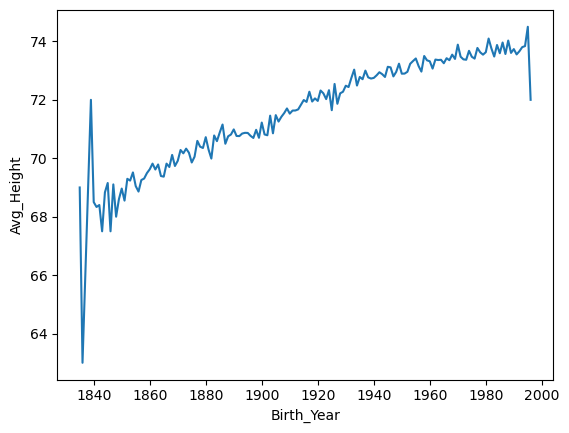

In [45]:
#average height vs birth year line plot
sns.lineplot(data=avg_height, x="Birth_Year", y="Avg_Height")

In [10]:
#pandas df for average height of players according to birth year where average height is more than 70
avg_height_70 = pd.read_sql_query("SELECT birthYear as Birth_Year, avg(height) AS Avg_Height, count(*) AS No_of_Players FROM Master GROUP BY birthYear HAVING Birth_Year NOTNULL AND  Avg_Height > 70 ORDER BY birthYear", conn)
display(avg_height_70)

,Birth_Year,Avg_Height,No_of_Players
0,1839,72.000000,1
1,1868,70.114286,90
2,1871,70.283019,64
3,1872,70.169492,71
4,1873,70.329114,86
...,...,...,...
121,1992,73.663636,110
122,1993,73.803571,56
123,1994,73.838710,31
124,1995,74.500000,6


<Axes: xlabel='Birth_Year', ylabel='Avg_Height'>

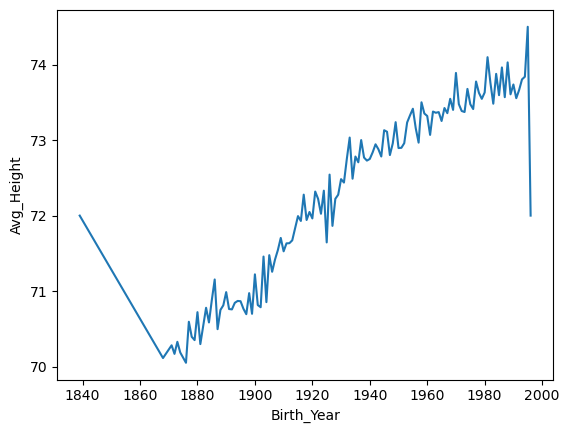

In [11]:
#average height>70 vs birth year line plot
sns.lineplot(data=avg_height_70, x="Birth_Year", y="Avg_Height")

## Part III (20 points)

(i) Find the namefirst, namelast, playerid and yearid of all people who were successfully inducted into the Hall of Fame in descending order of yearid. Save the results into a Pandas DataFrame.

(ii) Display the first 10 rows of the dataframe in (i). 

(iii) Display the total number of rows of the dataframe in (i).


(iv) Find the people who were successfully inducted into the Hall of Fame and played in college at a school located in the state of California. For each person, return their namefirst, namelast, playerid, school name (name_full), and yearid in descending order of yearid. Break ties on yearid by school name (ascending). yearid refers to the year of induction into the Hall of Fame. Save the results in a dataframe and display the entire dataframe. 

In [12]:
#pandas df for list of inducted players in Hall of Fame
inducted_players = pd.read_sql_query("""SELECT nameFirst, nameLast, Master.playerID, yearid 
                                        FROM HallOfFame JOIN Master on HallofFame.playerID = Master.playerID 
                                        WHERE inducted == 'Y' 
                                        ORDER BY HallofFame.yearid DESC;""", conn)

In [13]:
#total number of rows of the inducted_players dataframe
inducted_players.head(10)

,nameFirst,nameLast,playerID,yearid
0,Jeff,Bagwell,bagweje01,2017
1,Tim,Raines,raineti01,2017
2,Ivan,Rodriguez,rodriiv01,2017
3,John,Schuerholz,schurjo99,2017
4,Bud,Selig,seligbu99,2017
5,Ken,Griffey,griffke02,2016
6,Mike,Piazza,piazzmi01,2016
7,Craig,Biggio,biggicr01,2015
8,Randy,Johnson,johnsra05,2015
9,Pedro,Martinez,martipe02,2015


In [14]:
#total number of rows of the inducted_players dataframe
len(inducted_players)

317

In [39]:
#pandas df for list of students who are successfully inducted in Hall of Fame and played in college in CA
inducted_clgCA = pd.read_sql_query("""SELECT DISTINCT nameFirst, nameLast, H.playerID, name_full as SchoolName, H.yearid as YearOfInduction 
                                      FROM Master M
                                      Right JOIN HallOfFame H ON H.playerID = M.playerID
                                      LEFT JOIN CollegePlaying C ON C.playerID = H.playerID
                                      LEFT JOIN Schools S ON C.schoolID = S.schoolID
                                      WHERE S.state = 'CA'
                                      AND H.inducted = 'Y'
                                      ORDER BY H.yearid DESC, name_full ASC;""", conn)

display(inducted_clgCA)

,nameFirst,nameLast,playerID,SchoolName,YearOfInduction
0,Randy,Johnson,johnsra05,University of Southern California,2015
1,Pat,Gillick,gillipa99,Los Angeles Valley College,2011
2,Pat,Gillick,gillipa99,University of Southern California,2011
3,Doug,Harvey,harvedo99,San Diego State University,2010
4,Dick,Williams,willidi02,Pasadena City College,2008
5,Tony,Gwynn,gwynnto01,San Diego State University,2007
6,Ozzie,Smith,smithoz01,"California Polytechnic State University, San L...",2002
7,Tom,Seaver,seaveto01,Fresno City College,1992
8,Tom,Seaver,seaveto01,University of Southern California,1992
9,Joe,Morgan,morgajo02,Merritt College,1990


## Part IV (20 points)

Find the namefirst, namelast, playerid, yearid, and single-year slg (Slugging Percentage) of the players and save the results in a dataframe. For statistical significance, only include players with more than 50 at-bats in the season. Order the results by slg descending. 

Display the players with the 10 best annual Slugging Percentage recorded over all time. 

Slugging Percentage is not provided in the database. It can be computed using a formula given at https://en.wikipedia.org/wiki/Slugging_percentage and the data in the database. Note that there is one term in the formula that is not directly available as a column in the database. You will have to compute it using some of the columns. 

Also, you have to compute slg as a floating point number, so make sure to use SQL in a way to get this. 

In [16]:
#Slugging percentage of the players with at-bats>50
slg_players = pd.read_sql_query("""SELECT nameFirst, nameLast, Batting.playerID, yearid, 
                                   CAST((CAST((H-("2B"+"3B"+HR)) AS FLOAT) + CAST(2*"2B" AS FLOAT) + CAST(3*"3B" AS FLOAT) + CAST(4*HR AS FLOAT)) / CAST(AB AS FLOAT) AS FLOAT) AS SLG 
                                   FROM Batting, Master 
                                   WHERE Master.playerID = Batting.playerID 
                                   AND AB > 50 
                                   ORDER BY slg DESC;""", conn)

In [17]:
#list of players with the 10 best annual Slugging Percentage recorded over all time.
slg_players.head(10)

,nameFirst,nameLast,playerID,yearID,SLG
0,Shane,Spencer,spencsh01,1998,0.910448
1,Ted,Williams,willite01,1953,0.901099
2,Barry,Bonds,bondsba01,2001,0.863445
3,Babe,Ruth,ruthba01,1920,0.849015
4,Babe,Ruth,ruthba01,1921,0.846296
5,Jeff,Baker,bakerje03,2006,0.824561
6,Marlon,Anderson,anderma02,2006,0.812500
7,Barry,Bonds,bondsba01,2004,0.812332
8,Barry,Bonds,bondsba01,2002,0.799007
9,Babe,Ruth,ruthba01,1927,0.772222


## Part V (20 points)

(i) Find the yearid, min, max, and average of all player salaries for each year recorded, ordered by yearid in ascending order. Save the results as a dataframe and display it. 

(ii) For the player salaries in 2016, display a histogram with 10 bins. You may use the dataframe.hist(bin=10) function to do this. Also, it may be nicer to divide the salaries by 1,000,000 to show the amounts in millions. 

In [18]:
#salaries summary for each year
salaries = pd.read_sql_query("SELECT yearid, min(salary) as Min, max(salary) as Max, round(avg(salary),2) as Avg from Salaries GROUP BY yearid ORDER BY yearid;", conn)
display(salaries)

,yearID,Min,Max,Avg
0,1985,60000.0,2130300.0,476299.45
1,1986,60000.0,2800000.0,417147.04
2,1987,62500.0,2127333.0,434729.47
3,1988,62500.0,2340000.0,453171.08
4,1989,62500.0,2766667.0,506323.08
5,1990,100000.0,3200000.0,511973.69
6,1991,100000.0,3800000.0,894961.19
7,1992,109000.0,6100000.0,1047520.58
8,1993,0.0,6200000.0,976966.56
9,1994,50000.0,6300000.0,1049588.56


Text(0.5, 1.0, 'Player Salaries in 2016')

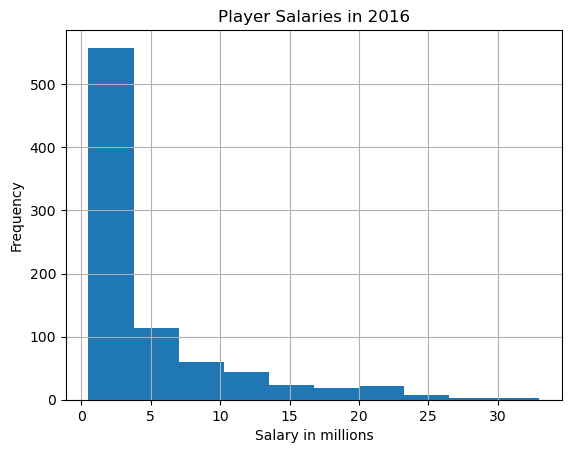

In [40]:
# histogram of salaries for year 2016 in millions
salary_2016 = pd.read_sql_query("SELECT salary/1000000 AS Salary from Salaries WHERE yearid = 2016;", conn)

salary_2016.hist(bins=10)
plt.xlabel('Salary in millions')
plt.ylabel('Frequency')
plt.title('Player Salaries in 2016')

## Part VI (10 points)

Extract and display a facet of the dataset that you think is interesting. This should not be a facet from Parts I-V. 

### Facet 1

At what age maximum players hit their maximum home runs?
Here is the plot showing us that there are maximum number of players who hit the highest home runs in their liftime is in their thirtees, specially at the age of 37 and 39.

In [20]:
HR_vs_age = pd.read_sql_query("""SELECT batting.playerid, yearid, HR, (yearid-birthYear) AS Age
                              FROM Batting 
                              JOIN Master ON batting.playerid = master.playerID 
                              WHERE hr <> 0 
                              GROUP BY batting.playerID 
                              HAVING HR = max(hr);""", conn)
display(HR_vs_age)

,playerID,yearID,HR,Age
0,aaronha01,1971,47,37.0
1,aaronto01,1962,8,23.0
2,abbated01,1904,3,27.0
3,abbeych01,1895,8,29.0
4,abbotfr01,1903,1,29.0
...,...,...,...,...
7731,zuletju01,2001,6,26.0
7732,zuninmi01,2014,22,23.0
7733,zupcibo01,1992,3,26.0
7734,zuvelpa01,1989,2,31.0


<Axes: xlabel='Age', ylabel='HR'>

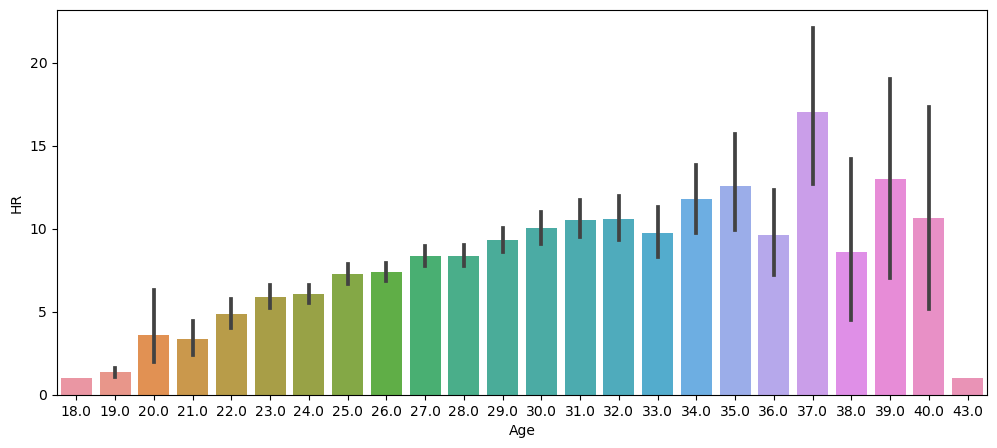

In [21]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x="Age", y="HR", ax=ax, data=HR_vs_age)

### Facet 2

Which school produce produced the students who won highest number of awards?
Here is the plot of colleges who produced students who won maximum number of awards. From the plot we can derive that students of ASU and Ohio State are at the top followed by Boston, Columbia, Texas Wesleyan etcetra.

Text(0.5, 1.0, 'Top 10 schools whose students won highest number of awards')

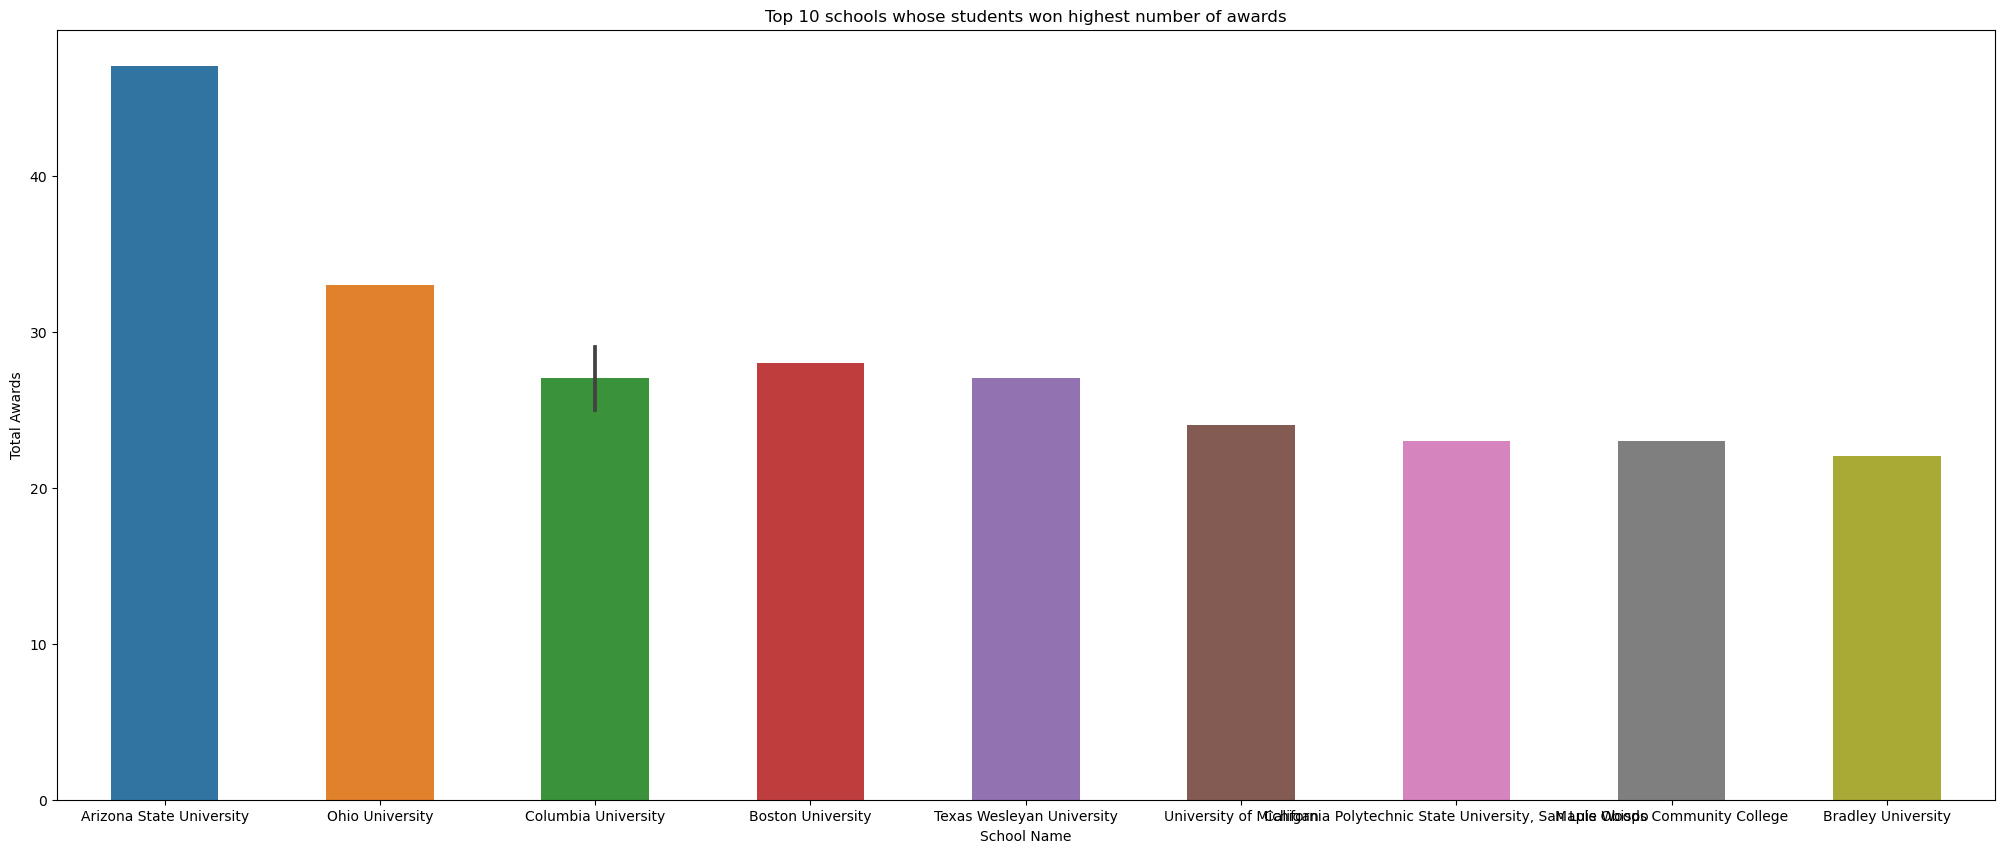

In [22]:
awrds_vs_schl = pd.read_sql_query("select A.playerID, a.total_awards as total_awards, s.name_full as school_name from (select playerID, count(awardid) as total_awards from AwardsPlayers group by playerID order by total_awards DESC) A join CollegePlaying C on A.playerID = C.playerID join Schools S on S.schoolID = C.schoolID group by a.playerID order by total_awards DESC LIMIT 10;", conn)
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x="school_name", y="total_awards", width=0.5, ax=ax, data=awrds_vs_schl)
plt.xlabel("School Name")
plt.ylabel("Total Awards")
plt.title("Top 10 schools whose students won highest number of awards")

In [43]:
c.close()
conn.close()